# Визуализация погрешностей
ИМХО: ничто не сравнится с originlab в работе с погрешностями
ПС. сейчас узнаем

## Простые планки погрешностей

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
import numpy as np

In [4]:
x = np.linspace(0, 10, 50)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

<ErrorbarContainer object of 3 artists>

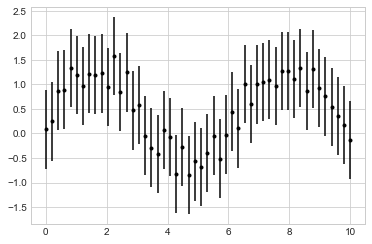

In [5]:
dy = 0.8
y = np.sin(x) + dy * np.random.rand(50)
plt.errorbar(x, y, yerr=dy, fmt='.k')

In [7]:
# plt.errorbar?

# plt.errorbar(
#     x,
#     y,
#     yerr=None,
#     xerr=None,
#     fmt='',
#     ecolor=None,
#     elinewidth=None,
#     capsize=None,
#     barsabove=False,
#     lolims=False,
#     uplims=False,
#     xlolims=False,
#     xuplims=False,
#     errorevery=1,
#     capthick=None,
#     *,
#     data=None,
#     **kwargs,
# )

# Parameters
# ----------
# x, y : float or array-like
#     The data positions.

# xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
#     The errorbar sizes:

#     - scalar: Symmetric +/- values for all data points.
#     - shape(N,): Symmetric +/-values for each data point.
#     - shape(2, N): Separate - and + values for each bar. First row
#       contains the lower errors, the second row contains the upper
#       errors.
#     - *None*: No errorbar.

#     Note that all error arrays should have *positive* values.

#     See :doc:`/gallery/statistics/errorbar_features`
#     for an example on the usage of ``xerr`` and ``yerr``.

# fmt : str, default: ''
#     The format for the data points / data lines. See `.plot` for
#     details.

#     Use 'none' (case insensitive) to plot errorbars without any data
#     markers.

# ecolor : color, default: None
#     The color of the errorbar lines.  If None, use the color of the
#     line connecting the markers.

# elinewidth : float, default: None
#     The linewidth of the errorbar lines. If None, the linewidth of
#     the current style is used.

# capsize : float, default: :rc:`errorbar.capsize`
#     The length of the error bar caps in points.

# capthick : float, default: None
#     An alias to the keyword argument *markeredgewidth* (a.k.a. *mew*).
#     This setting is a more sensible name for the property that
#     controls the thickness of the error bar cap in points. For
#     backwards compatibility, if *mew* or *markeredgewidth* are given,
#     then they will over-ride *capthick*. This may change in future
#     releases.

# barsabove : bool, default: False
#     If True, will plot the errorbars above the plot
#     symbols. Default is below.

# lolims, uplims, xlolims, xuplims : bool, default: False
#     These arguments can be used to indicate that a value gives only
#     upper/lower limits.  In that case a caret symbol is used to
#     indicate this. *lims*-arguments may be scalars, or array-likes of
#     the same length as *xerr* and *yerr*.  To use limits with inverted
#     axes, `~.Axes.set_xlim` or `~.Axes.set_ylim` must be called before
#     :meth:`errorbar`.  Note the tricky parameter names: setting e.g.
#     *lolims* to True means that the y-value is a *lower* limit of the
#     True value, so, only an *upward*-pointing arrow will be drawn!

# errorevery : int or (int, int), default: 1
#     draws error bars on a subset of the data. *errorevery* =N draws
#     error bars on the points (x[::N], y[::N]).
#     *errorevery* =(start, N) draws error bars on the points
#     (x[start::N], y[start::N]). e.g. errorevery=(6, 3)
#     adds error bars to the data at (x[6], x[9], x[12], x[15], ...).
#     Used to avoid overlapping error bars when two series share x-axis
#     values.

<ErrorbarContainer object of 3 artists>

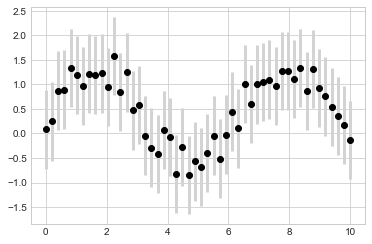

In [8]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgrey', elinewidth=3, capsize=0)

<ErrorbarContainer object of 3 artists>

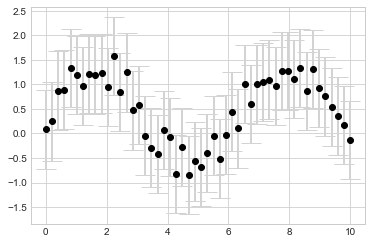

In [13]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgrey', elinewidth=2, capsize=10)

## Непрерывные погрешности
Для случаев, когда надо отображать планки погрешностей для непрерывных велични

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [16]:
# описываем модель, и отрисовываем некоторые данные
model = lambda x: x * np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

In [17]:
ydata

array([ 0.84147098,  0.42336002, -4.79462137, -1.67649299,  7.91486597])

In [28]:
xdata

array([1, 3, 5, 6, 8])

In [40]:
# выполним подгонку Гауссова процесса
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(xdata[:, np.newaxis], ydata)

In [44]:
xfit = np.linspace(0, 10, 1000)
yfit = gp.predict(xfit[:, np.newaxis])


(0.0, 10.0)

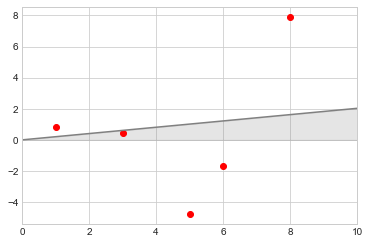

In [45]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color = 'grey')
plt.fill_between(xfit, yfit, color = 'gray', alpha = 0.2)
plt.xlim(0, 10)
# хрень

###### Короче, для закрашивания областей м/у графиками ``plt.fill_between`` и  ``plt.fill``
Полубому непрерывные погрешности уже встоены в библиотеку
Так же это реализовано в пакете ``Seaborn``